In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as rnd

# data is dataframe containing all data 
# it contains 19019 entries for 11 features
data = pd.read_csv('magic04.data')

print(np.shape(data))

print(data.head())

# coded by LukeBroc 19-01
# edited by

(19019, 11)
    28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.011  -8.2027  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887   9.8145   

    40.092  81.8828  g  
0   6.3609  205.261  g  
1  76.9600  256.788  g  
2  10.4490  116.737  g  
3   4.6480  356.462  g  
4   3.6130  238.098  g  


data content: features

    0: Length: continuous # major axis of ellipse [mm]
    1: Width: continuous # minor axis of ellipse [mm]
    2: Size: continuous # 10-log of sum of content of all pixels [in #phot]
    3: Conc2: continuous # ratio of sum of two highest pixels over fSize [ratio]
    4: Conc1: continuous # ratio of highest pixel over fSize [ratio]
    5: pdist: cont# distance from highest pixel to center, proj onto major axis [mm]
    6: M3Long: continuous # 3rd root of third moment along major axis [mm]
    7: M3Trans: continuous # 3rd root of third moment along minor axis [mm]
    8: Alpha: continuous # angle of major axis with vector to origin [deg]
    9: Dist: continuous # distance from origin to center of ellipse [mm]
    10: class: g,h # gamma (signal), hadron (background)
    
    
split up the data ( 1/3 is test set, 2/3 is training set)

also i am defining gamma as 1 and hadrons as -1
    


In [36]:
def split_data(data,parts):
    indexes = np.arange(0,data.shape[0],1)
    rnd.shuffle(indexes)  #shuffle data to break up order gamma/had
    
    n_test_indexes = int(len(indexes) / parts)
    test_indexes = indexes[:n_test_indexes]
    train_indexes = indexes[n_test_indexes:]
    
    for i in range(data.shape[0]):
        if (data[i,10] == 'g'):
            data[i,10] = 1
        if (data[i,10] == 'h'):
            data[i,10] = -1
    
    # 1s are gamma -1 are had
    
    
    
    test_data = data[test_indexes,:]
    train_data = data[train_indexes,:]
    
    X_train = train_data[:,:10]
    Y_train = train_data[:,10]
    X_test = test_data[:,:10]
    Y_test = test_data[:,10]
    
    return X_train, Y_train, X_test, Y_test

Now I divide data

In [37]:
data = np.array(data)
n_parts = 5 #this gives 1/3 of dataset as test and 2/3 as training set

X_train, Y_train, X_test, Y_test = split_data(data, n_parts)

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))


(15216, 10)
(15216,)
(3803, 10)
(3803,)


In fashion of the article, checking distribution on lenght VS size to visualize their linear dependence. I want to rescale all parameters but alpha and size by their dependence on size


[  62.93632229 -124.60625654]
53.227583175605034


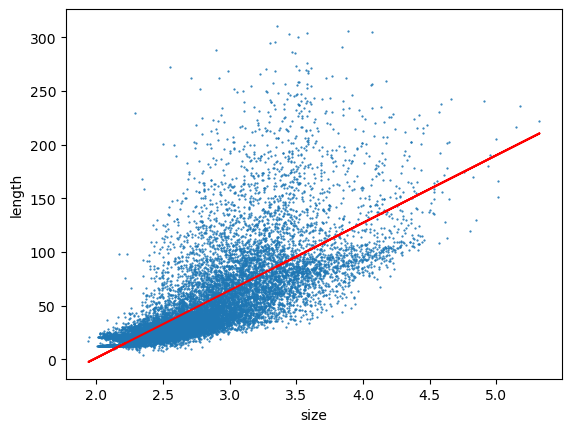

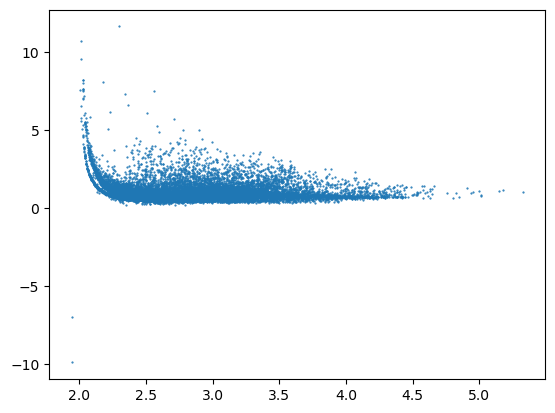

In [140]:
#sel = X_train[Y_train == 1]

x = X_train[:,2].copy()

y = X_train[:,0].copy()

x_t = X_test[:,2].copy()
y_t = X_test[:,0].copy()

X_train_rescaled = X_train.copy()
X_test_rescaled = X_test.copy()


import scipy.optimize as optimize

def f(x,a,b):
    return a*x + b

params, params_cov = optimize.curve_fit(f,x,y)

print(params)

avg = np.average(y)
print(avg)

plt.scatter(x,y,s=0.3)
plt.plot(x,f(x,params[0],params[1]),c='red')
plt.xlabel('size')
plt.ylabel('length')
plt.show()

# i am rescaling dividing by the fit expected value per each point

y_rescaled = y / (x*params[0]+params[1])
y_t_rescaled = y_t / (x_t*params[0]+params[1])

X_train_rescaled[:,0] = y_rescaled
X_test_rescaled[:,0] = y_t_rescaled


plt.scatter(x,y_rescaled,s=0.3)
plt.show()

I will be now correcting all params except alpha and size with this method (the article does so, why shouldn't I?)

In [142]:
to_be_rescaled_indexes = [1,3,4,5,6,7,9]

for i in to_be_rescaled_indexes:
    x = X_train[:,2].copy()
    x_t = X_test[:,2].copy()
    y = X_train[:,i].copy()
    y_t = X_test[:,i].copy()
    
    ''' plt.scatter(x,y,s=0.3)
    plt.show()
    print('')'''
    
    params, params_cov = optimize.curve_fit(f,x,y)
    
    y_rescaled = y / (x*params[0]+params[1])
    y_t_rescaled = y_t / (x_t*params[0]+params[1])

    X_train_rescaled[:,i] = y_rescaled
    X_test_rescaled[:,i] = y_t_rescaled

print(X_train[0])
print(X_train_rescaled[0])
print(X_test[0])
print(X_test_rescaled[0])

[62.7921 25.7291 3.3498 0.2029 0.1187 41.2823 57.4163 -21.3179 2.477
 223.414]
[0.7282959421218367 0.699290363885355 3.3498 0.9781338307591745
 1.0302754977149795 -2.824810527734726 3.528719178447629
 409.47992528206925 2.477 0.9710396577988127]
[118.1798 57.7751 3.1979 0.2059 0.1245 -95.4522 -146.5194 11.6968 27.9287
 162.699]
[1.5416537766471239 1.7744846797426654 3.1979 0.7993846742079541
 0.8640673581619956 8.18643535082204 -10.005155947454673
 -941.2943740802322 27.9287 0.7407306371636142]


defining functions for finding cut value per each parameter

In [73]:
def find_cut_value(X,Y,par_index):
    new_X = X[:,par_index]
    #print(np.shape(new_X))
    
    trials = 1000
    par_range = max(new_X) - min(new_X) 
    
    
    signal = Y[Y == 1] 
    background = Y[Y == -1]
    
    step = par_range / trials
    best_Q = 0
    best_cut = min(new_X)
    
    #check
    #print("start:",best_cut)
    
    for i in range(trials):
        actual_par = min(new_X) + i * step
        n_accepted_gamma = 0
        n_accepted_hadron = 0
        
        for j in range(len(new_X)):
            if new_X[j] <= actual_par and Y[j] == 1:
                n_accepted_gamma += 1
            if new_X[j] <= actual_par and Y[j] == -1:
                n_accepted_hadron += 1
        
        
        #abuso matematico
        if(n_accepted_hadron == 0):
            n_accepted_hadron = 0.1
        ##########################################################################
        
            
        Q = (n_accepted_gamma / len(signal)) / np.sqrt(n_accepted_hadron / len(background))
        
        if (Q > best_Q):
            best_Q = Q
            best_cut = actual_par
    
    
    return best_Q, best_cut



    
#this function finds the parameter that maximizes Q value, so it's the best to cut first

def find_best_par(X_train,Y_train,indexes):
    Qs = []
    cuts = []
    
    
    for i in indexes:
        par_index = i
        best_Q, best_cut = find_cut_value(X_train,Y_train,par_index)
        #print(i, best_Q, best_cut,'\n')
        Qs.append(best_Q)
        cuts.append(best_cut)
    
    Qs = np.array(Qs)
    cuts = np.array(cuts)
    best_Q = max(Qs)
    best_cut = cuts[np.argmax(Qs)]
    best_index = indexes[np.argmax(Qs)]
    '''print('')
    print(max(X_train[:,best_index]),min(X_train[:,best_index]))
    print(Qs)
    print(cuts)
    print(indexes,' ',best_index,'\n')'''
    
    X_sel = X_train[X_train[:,best_index] <= best_cut]
    Y_sel = Y_train[X_train[:,best_index] <= best_cut]
    
    return best_Q, best_cut, best_index, Qs, cuts, X_sel, Y_sel
    
    
    

Finding cut values for not rescaled data

In [74]:
indexes = np.arange(0,X_train.shape[1],1)
mask = np.ones(len(indexes),dtype = bool)
res = indexes[mask]

X_sel = X_train.copy()
Y_sel = Y_train.copy()

cut_values = np.zeros((X_train.shape[1],4))

for i in range(X_train.shape[1]):
    best_Q, best_cut, index, Qs, cuts, X_sel, Y_sel = find_best_par(X_sel,Y_sel,res)
    mask[index] = False
    res = indexes[mask]
    print("best Q, best cut, index",best_Q.round(3),best_cut.round(3),index)
    print('selected datapoints:',len(Y_sel),'\n')
    
    #cut values contains best cut values and indexes of the feature used for cut
    cut_values[i,0] = best_cut
    cut_values[i,1] = index
    cut_values[i,2] = best_Q
    cut_values[i,3] = len(Y_sel)


5358
5358
5358
5358


KeyboardInterrupt: 

here there are the cut values, in order of relevance, with their associated feature and their Q and the number of points that are kept with that cut

In [62]:
cut_values[:,3] /= X_train.shape[0]
print('   cut value   ##   n label   ##   Q value   ##  fraction of points')
print(cut_values,'\n')

sorted_values = cut_values[cut_values[:,1].argsort()]
print(sorted_values)


   cut value   ##   n label   ##   Q value   ##  fraction of points
[[1.18800000e+01 8.00000000e+00 1.52215327e+00 1.42581212e-34]
 [1.03530797e+02 0.00000000e+00 1.12601813e+00 1.33226750e-34]
 [2.42978700e-01 4.00000000e+00 1.08988865e+00 1.04408603e-34]
 [3.66905696e+01 1.00000000e+00 1.05786683e+00 9.86678453e-35]
 [3.32197600e-01 3.00000000e+00 1.03205002e+00 7.42867783e-35]
 [1.07020346e+02 5.00000000e+00 1.01053709e+00 7.41266775e-35]
 [3.73079619e+02 9.00000000e+00 1.00091293e+00 7.35777604e-35]
 [4.12092300e+00 2.00000000e+00 9.99676689e-01 7.35548889e-35]
 [1.14486825e+02 6.00000000e+00 9.99676585e-01 7.35320173e-35]
 [3.55314848e+01 7.00000000e+00 9.99676480e-01 7.35091458e-35]] 

[[1.03530797e+02 0.00000000e+00 1.12601813e+00 1.33226750e-34]
 [3.66905696e+01 1.00000000e+00 1.05786683e+00 9.86678453e-35]
 [4.12092300e+00 2.00000000e+00 9.99676689e-01 7.35548889e-35]
 [3.32197600e-01 3.00000000e+00 1.03205002e+00 7.42867783e-35]
 [2.42978700e-01 4.00000000e+00 1.08988865e+00 

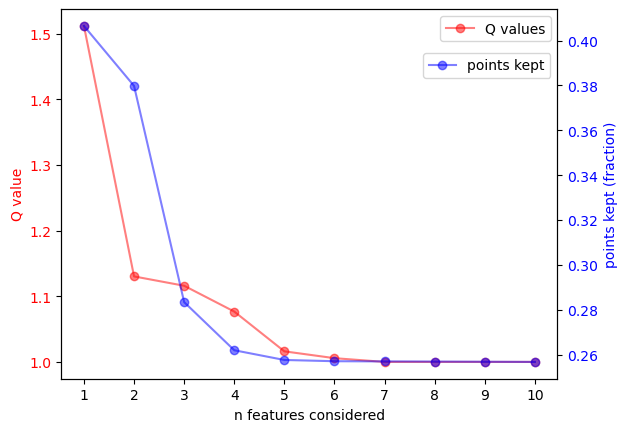

In [9]:
n_features_considered = np.arange(1,11,1)

fig, ax1 = plt.subplots()
ax1.set_xlabel('n features considered')
ax1.set_ylabel('Q value', color = 'red')
ax1.plot(n_features_considered,cut_values[:,2],c='red',marker='o',label='Q values',alpha=0.5)
ax1.tick_params(axis='y',labelcolor='red')
ax1.set_xticks(n_features_considered)

ax2 = ax1.twinx()
ax2.set_ylabel('points kept (fraction)',color='blue')
ax2.plot(n_features_considered,cut_values[:,3],c='blue',marker='o',label='points kept',alpha=0.5)
ax2.tick_params(axis='y',labelcolor='blue')
ax1.legend(loc='upper left', bbox_to_anchor=(0.75, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0.715, 0.9))
plt.show()

Now trying to find ROC curve point on TEST SET

In [72]:
print(np.shape(X_test))
print(np.shape(Y_test))
print(np.shape(cut_values))

accepted_gammas = 0
accepted_hadrons = 0

for j in range(len(Y_test)):
    is_accepted = 1
    for i in range(cut_values.shape[0]):
        if(X_test[j,i] > sorted_values[i,0]):
            is_accepted = 0
    if is_accepted == 1 and Y_test[j] == 1:
        accepted_gammas += 1
    if is_accepted == 1 and Y_test[j] == -1:
        accepted_hadrons +=1

print(accepted_gammas,accepted_hadrons)

tot_gammas = len(Y_test[Y_test == 1])
tot_hadrons = len(Y_test[Y_test == -1])

print(tot_gammas,tot_hadrons)

ROC_y = accepted_gammas / tot_gammas
ROC_x = accepted_hadrons / tot_hadrons

print(ROC_x,ROC_y)

(3803, 10)
(3803,)
(10, 4)
734 29
2474 1329
0.0218209179834462 0.29668552950687144



# ROC CURVE




Now defining functions for calculating ROC curve





###################



In [153]:
def find_cut_value_set_hadron(X,Y,par_index,min_h):
    new_X = X[:,par_index]
    trials = 1000
    par_range = abs(max(new_X) - min(new_X))
    
    signal = Y[Y == 1] 
    background = Y[Y == -1]
    #print("bg:",len(background))
    #print("len background is",len(background))
    
    if(min_h > len(background)):
        #print('ERROR! TOO MANY HADRONS,NUMBER OF MIN_H has been overflowed!')
        return 0, max(new_X)
    
    step = par_range / trials
    best_Q = 0
    best_cut = min(new_X)
    
    for i in range(trials):
        actual_par = min(new_X) + i * step
        n_accepted_gamma = 0
        n_accepted_hadron = 0
        
        for j in range(len(new_X)):
            if new_X[j] <= actual_par and Y[j] == 1:
                n_accepted_gamma += 1
            if new_X[j] <= actual_par and Y[j] == -1:
                n_accepted_hadron += 1
        #######################################################################        
        if(n_accepted_hadron == 0):
            n_accepted_hadron = 0.1
        if(len(background) == 0):
            background = [1]
        #######################################################################    
            
        Q = (n_accepted_gamma / len(signal)) / np.sqrt(n_accepted_hadron / len(background))
        
        if (Q > best_Q and n_accepted_hadron < (len(background - min_h))):
            best_Q = Q
            best_cut = actual_par
      
    return best_Q, best_cut
    
    
    
#this function finds the parameter that maximizes Q value, so it's the best to cut first

def find_best_par_set_hadron(X_train,Y_train,indexes,min_h):
    Qs = []
    cuts = []
    
    
    for i in indexes:
        par_index = i
        best_Q, best_cut = find_cut_value_set_hadron(X_train,Y_train,par_index,min_h)
        #print(i, best_Q, best_cut,'\n')
        Qs.append(best_Q)
        cuts.append(best_cut)
    
    Qs = np.array(Qs)
    cuts = np.array(cuts)
    best_Q = max(Qs)
    best_cut = cuts[np.argmax(Qs)]
    best_index = indexes[np.argmax(Qs)]
        
    '''print('')
    print(max(X_train[:,best_index]),min(X_train[:,best_index]))
    print(Qs)
    print(cuts)
    print(indexes,' ',best_index,'\n')'''

    X_sel = X_train[X_train[:,best_index] <= best_cut]
    Y_sel = Y_train[X_train[:,best_index] <= best_cut]
           
    return best_Q, best_cut, best_index, Qs, cuts, X_sel, Y_sel
    
    
def ROC_params(X_train,Y_train,X_test,Y_test,max_h):
    ROC_CURVE_X = []
    ROC_CURVE_Y = []
    ROC_CURVE_min_h = []
    
    for min_h in range(max_h):

        if min_h % 150 == 0:
            print('set min_h to:',min_h)
            indexes = np.arange(0,X_train.shape[1],1)
            mask = np.ones(len(indexes),dtype = bool)
            res = indexes[mask]

            X_sel = X_train.copy()
            Y_sel = Y_train.copy()

            cut_values = np.zeros((X_train.shape[1],4))

            for i in range(X_train.shape[1]):
                best_Q, best_cut, index, Qs, cuts, X_sel, Y_sel = find_best_par_set_hadron(X_sel,Y_sel,res,min_h)
                mask[index] = False
                res = indexes[mask]
                #print("best Q, best cut, index",best_Q.round(3),best_cut.round(3),index)
                #print('selected datapoints:',len(Y_sel),'\n')

                #cut values contains best cut values and indexes of the feature used for cut
                cut_values[i,0] = best_cut
                cut_values[i,1] = index
                cut_values[i,2] = best_Q
                cut_values[i,3] = len(Y_sel)

            accepted_gammas = 0
            accepted_hadrons = 0
            
            sorted_values = cut_values[cut_values[:,1].argsort()]
            #print(sorted_values,'\n')
            
            for j in range(len(Y_test)):
                is_accepted = 1
                for i in range(cut_values.shape[0]):
                    if(X_test[j,i] > sorted_values[i,0]):
                        is_accepted = 0
                if is_accepted == 1 and Y_test[j] == 1:
                    accepted_gammas += 1
                if is_accepted == 1 and Y_test[j] == -1:
                    accepted_hadrons +=1

            tot_gammas = len(Y_test[Y_test == 1])
            tot_hadrons = len(Y_test[Y_test == -1])

            ROC_y = accepted_gammas / tot_gammas
            ROC_x = accepted_hadrons / tot_hadrons

            ROC_CURVE_X.append(ROC_x)
            ROC_CURVE_Y.append(ROC_y)
            ROC_CURVE_min_h.append(min_h)
            
            print(ROC_CURVE_X)
            print(ROC_CURVE_Y,'\n')
    
    return ROC_CURVE_X, ROC_CURVE_Y,ROC_CURVE_min_h

In [146]:
max_h = len(Y_train[Y_train == -1])
print(max_h)


x,y,min_hs = ROC_params(X_train,Y_train,X_test,Y_test,max_h)

print(x,'\n')
print(y,'\n')

5359
set min_h to: 0


KeyboardInterrupt: 

Trying with rescaled dataset

In [154]:
max_h = len(Y_train[Y_train == -1])
print(max_h)

x,y,min_hs = ROC_params(X_train_rescaled,Y_train,X_test_rescaled,Y_test,max_h)

print(x,'\n')
print(y,'\n')

5359
set min_h to: 0


TypeError: unsupported operand type(s) for -: 'list' and 'int'

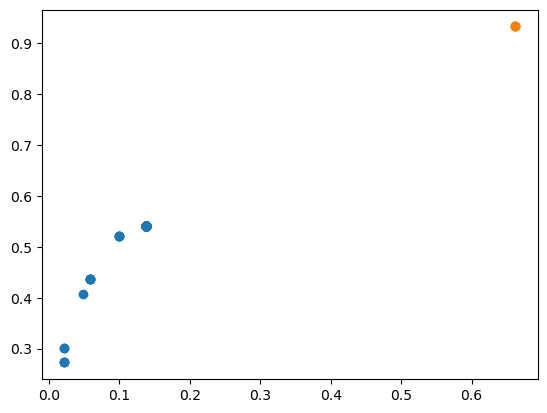

In [137]:

plt.scatter(x,y)
plt.scatter(x_noa,y_noa)

plt.show()

Hist plot

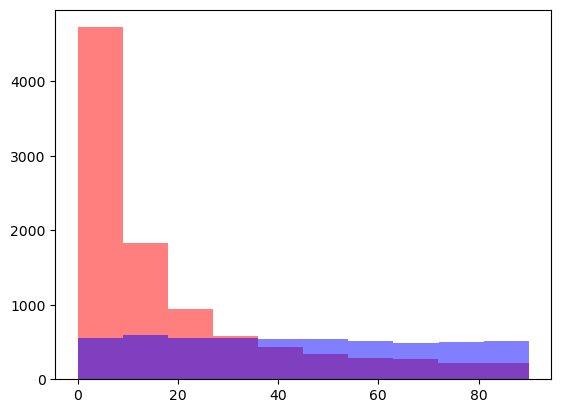

(15216, 10)


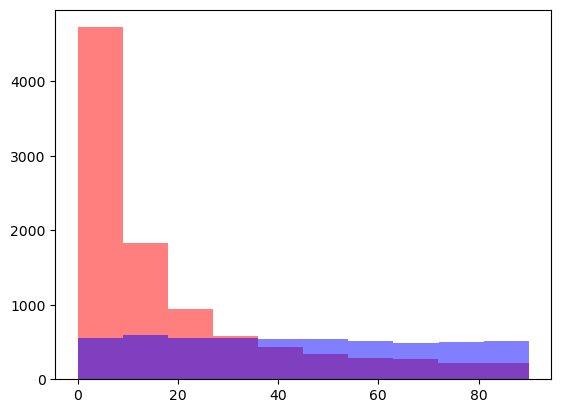

In [42]:
n = 8
colors = []
g_alpha = []
h_alpha = []

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        colors.append('red')
        g_alpha.append(X_train[i,n])
    if(Y_train[i] == -1):
        colors.append('blue')
        h_alpha.append(X_train[i,n])
        
plt.hist(g_alpha, alpha = 0.5, color = 'red')
plt.hist(h_alpha, alpha = 0.5, color = 'blue')
plt.show()

colors = []
g_alpha_res = []
h_alpha_res = []

print(np.shape(X_train_rescaled))

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        colors.append('red')
        g_alpha_res.append(X_train_rescaled[i,n])
    if(Y_train[i] == -1):
        colors.append('blue')
        h_alpha_res.append(X_train_rescaled[i,n])

plt.hist(g_alpha_res, alpha = 0.5, color = 'red')
plt.hist(h_alpha_res, alpha = 0.5, color = 'blue')
plt.show()

Same but with rescaled data

In [10]:
for i in range(X_train_rescaled.shape[1]):
    par_index = i
    best_Q, best_cut = find_cut_value (X_train_rescaled,Y_train,par_index)
    print("for index",i," best Q is",best_Q)
    print('best cut is',best_cut)

for index 0  best Q is 1.0217304326223096
best cut is 1.4241195593512561
for index 1  best Q is 1.0001136557371404
best cut is 343.1682660950985
for index 2  best Q is 1.0037811836819013
best cut is 4.3560479999999995
for index 3  best Q is 0.9998792270531401
best cut is 254.28488905070856
for index 4  best Q is 1.0002273502359715
best cut is 225.429602540541
for index 5  best Q is 1.0004268008982178
best cut is 1314.5523318255036
for index 6  best Q is 1.0126647953611603
best cut is 7.078420567923427
for index 7  best Q is 1.0002273502359715
best cut is 22489.20393376897
for index 8  best Q is 1.5120576560652896
best cut is 11.7
for index 9  best Q is 1.0002690338739604
best cut is 1.8975799274801777
